In [ ]:
pip install lifetimes

## Comprehensive Analysis and Predictive Modeling of Our Customers
You will find herets an in-depth analysis and predictive modeling of customer data for ClientCo Company  ny, focusing on understanding customer behavior, predicting future purchasing patterns, and deriving actionable insights. The analysis followthised approach:

- **Data Preparation:**
  - Essential data manipulation and visualization libraries are imported.
  - Transaction data is loaded and preprocessed for analysis.
  - Aggregation of transactions on various time scales provides initial insights into customer activity.

- **RFM Segmentation:**
  - Customers are segmented based on Recency, Frequency, and Monetary value using RFM metrics.
  - The data is divided into calibration and holdout sets to evaluate the predictive models effectively.
  - The BG/NBD model is applied to forecast future transaction behavior, with performance validated against the holdout set.

- **Predictive Modeling:**
  - The probability of each customer's active status is determined.
  - The Gamma-Gamma model is used to predict the average monetary value of future transactions for repeat customers.
  - Customer Lifetime Value is calculated, integrating the outputs from the BG/NBD and Gamma-Gamma models.

- **Customer Behavior Insights:**
  - Rolling metrics and churn analysis provide deeper insights into customer behavior.
  - Custom logic for churn identification helps target at-risk customers.
  - Visualizations of model outputs facilitate an intuitive understanding of the analysis and its accuracy.

The combination of RFM segmentation, predictive modeling, and custom analyses provides a nuanced view of the customer base, enabling targeted engagement strategies to drive profitability.


# __________________________________________________________________________________________________________

### Data Preparation :
- **Import Essential Libraries:** Import `lifetimes`, `pandas`, `numpy`, `matplotlib`, and `seaborn` for data manipulation and visualization.
- **Load and Prepare Data:** Load transaction data, converting date columns to datetime for proper analysis.
- **Aggregate Transactions:** Aggregate transactions on daily, weekly, and monthly intervals to analyze customer activity patterns.


In [ ]:
from lifetimes.utils import summary_data_from_transaction_data, calibration_and_holdout_data

In [ ]:
from lifetimes.datasets import load_dataset

In [ ]:
transaction_data = pd.read_csv('transactions_dataset.csv',sep=';')

In [ ]:
transaction_data.columns

Index(['date_order', 'date_invoice', 'product_id', 'client_id', 'sales_net',
       'quantity', 'order_channel', 'branch_id'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# converting the column date_order and date_invoice from object (yyyy-mm-dd) to datetime
transaction_data['date_order'] = pd.to_datetime(transaction_data['date_order'])
transaction_data['date_invoice'] = pd.to_datetime(transaction_data['date_invoice'])

In [ ]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63319315 entries, 0 to 63319314
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date_order     datetime64[ns]
 1   date_invoice   datetime64[ns]
 2   product_id     int64         
 3   client_id      int64         
 4   sales_net      float64       
 5   quantity       int64         
 6   order_channel  object        
 7   branch_id      int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 3.8+ GB


In [ ]:
# Aggregate transactions on different time scales
daily_transactions = transaction_data.set_index('date_order').groupby('client_id').resample('D').size()
weekly_transactions = transaction_data.set_index('date_order').groupby('client_id').resample('W').size()
monthly_transactions = transaction_data.set_index('date_order').groupby('client_id').resample('M').size()

In [ ]:
print("Daily Transactions per Customer:")
print(daily_transactions.mean())

print("Weekly Transactions per Customer:")
print(weekly_transactions.mean())

print("Monthly Transactions per Customer:")
print(monthly_transactions.mean())


Daily Transactions per Customer:
0.8634081564863763
Weekly Transactions per Customer:
5.966225165625314
Monthly Transactions per Customer:
24.47974754503982


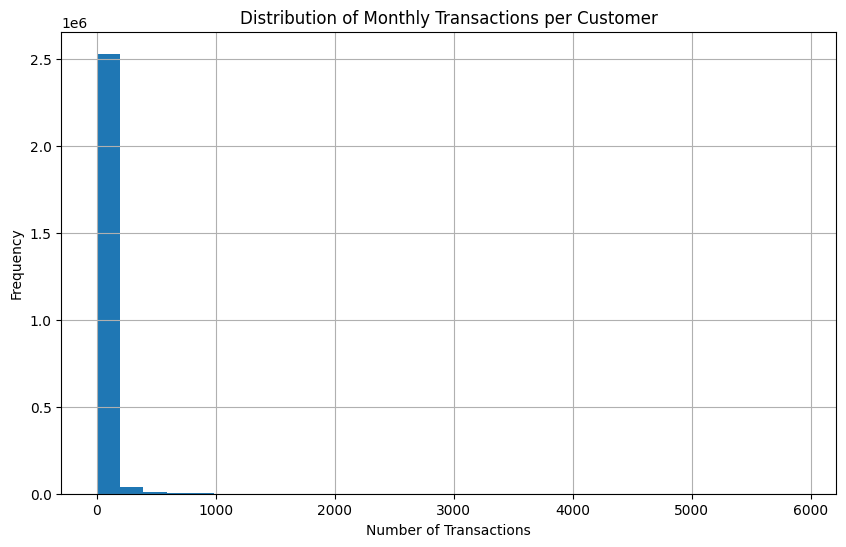

In [ ]:
import matplotlib.pyplot as plt

# Example for monthly transactions
plt.figure(figsize=(10, 6))
monthly_transactions.hist(bins=30)
plt.title('Distribution of Monthly Transactions per Customer')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.show()


# RFM Segmentation & Predictive Modeling :
- **Calculate RFM Metrics:** Use `lifetimes` utility to calculate RFM metrics for each customer.
- **Calibration and Holdout Sets:** Split data into calibration and holdout sets for accurate model evaluation.
- **BG/NBD Model:** Fit the BG/NBD model to forecast future transactions and evaluate its performance against holdout dat- **Alive Probability Calculation:** Determine the probability of a customer being active using the BG/NBD model.
- **Gamma-Gamma Model for Monetary Value:** Estimate the average monetary value of transactions for repeat customers with the Gamma-Gamma model.
- **Customer Lifetime Value (CLV):** Calculate CLV using outputs from both BG/NBD and Gamma-Gamma models to assess long-term customer value.a.


In [ ]:
# Aggregate transactions on different time scales and convert to DataFrame with named columns
daily_transactions = transaction_data.groupby('client_id').resample('D', on='date_order').size().reset_index(name='daily_transactions')
weekly_transactions = transaction_data.groupby('client_id').resample('W', on='date_order').size().reset_index(name='weekly_transactions')
monthly_transactions = transaction_data.groupby('client_id').resample('M', on='date_order').size().reset_index(name='monthly_transactions')

# Calculate the mean of transactions per period for each customer
daily_mean = daily_transactions.groupby('client_id')['daily_transactions'].mean().reset_index(name='daily_mean')
weekly_mean = weekly_transactions.groupby('client_id')['weekly_transactions'].mean().reset_index(name='weekly_mean')
monthly_mean = monthly_transactions.groupby('client_id')['monthly_transactions'].mean().reset_index(name='monthly_mean')

# Merge the means into a single DataFrame
aggregated_means = pd.merge(daily_mean, weekly_mean, on='client_id')
aggregated_means = pd.merge(aggregated_means, monthly_mean, on='client_id')

# Calculate descriptive statistics for the aggregated means
statistics = aggregated_means.describe()

# Show the statistics
print(statistics)

          client_id     daily_mean    weekly_mean   monthly_mean
count  1.705890e+05  170589.000000  170589.000000  170589.000000
mean   1.139310e+06       1.199386       4.963991      18.048776
std    6.567710e+05       3.682848      14.655456      58.887325
min    6.000000e+00       0.002793       0.019417       0.080000
25%    5.702510e+05       0.080838       0.554348       1.833333
50%    1.140437e+06       0.258065       1.468750       4.375000
75%    1.709745e+06       1.000000       4.000000      13.052632
max    2.274517e+06     396.000000    1015.730769    4225.440000


In [ ]:
# Filter out transactions with sales_net less than or equal to 0
filtered_transactions = transaction_data[transaction_data['sales_net'] > 0]

# Find the latest date in your filtered dataset
latest_date = filtered_transactions['date_order'].max()

# Now use this latest date in your call to summary_data_from_transaction_data
rfm = summary_data_from_transaction_data(
    transactions=filtered_transactions,
    customer_id_col='client_id',
    datetime_col='date_order',
    monetary_value_col='sales_net',
    observation_period_end=latest_date,  # Use the dynamically determined latest date
    freq='M'  # Weekly frequency, adjust if needed
)

rfm.reset_index(inplace=True)

In [ ]:
rfm.describe()

,client_id,frequency,recency,T,monetary_value
count,1.705860e+05,170586.000000,170586.000000,170586.000000,1.705860e+05
mean,1.139314e+06,9.266323,13.891632,18.574500,3.128761e+03
std,6.567712e+05,8.469041,8.883959,6.372500,1.207824e+04
min,6.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,5.702582e+05,2.000000,4.935484,15.741935,2.306658e+02
50%,1.140456e+06,6.000000,16.709677,21.580645,7.951239e+02
75%,1.709758e+06,17.000000,22.548387,22.580645,2.320942e+03
max,2.274517e+06,24.000000,23.548387,23.548387,1.679492e+06


In [ ]:
from datetime import timedelta

# Define observation and calibration periods
holdout_days = 120
current_date = filtered_transactions['date_order'].max()
calibration_end_date = current_date - timedelta(days=holdout_days)

/Users/nawid/anaconda3/envs/myenvironment/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

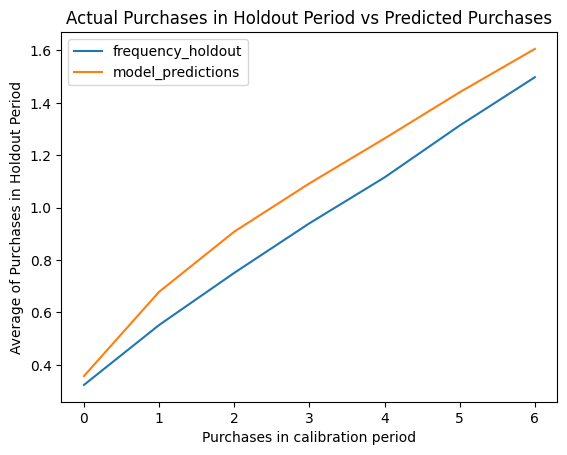

In [ ]:
from lifetimes.utils import calibration_and_holdout_data

# Assuming you've defined `calibration_end_date` based on your business cycle
summary_cal_holdout = calibration_and_holdout_data(
    transactions=filtered_transactions,
    customer_id_col='client_id',
    datetime_col='date_order',
    monetary_value_col='sales_net',
    calibration_period_end=calibration_end_date,
    observation_period_end=latest_date,
    freq='M'  # Monthly frequency
)
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.01)  # Start with a small penalizer_coef and adjust as necessary
bgf.fit(summary_cal_holdout['frequency_cal'], summary_cal_holdout['recency_cal'], summary_cal_holdout['T_cal'])
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

plot_calibration_purchases_vs_holdout_purchases(bgf, summary_cal_holdout)


In [ ]:
rfm.columns

Index(['client_id', 'frequency', 'recency', 'T', 'monetary_value',
       'alive_probability'],
      dtype='object')

In [ ]:
rfm['alive_probability'] = bgf.conditional_probability_alive(
    frequency=rfm['frequency'],
    recency=rfm['recency'],
    T=rfm['T']
)

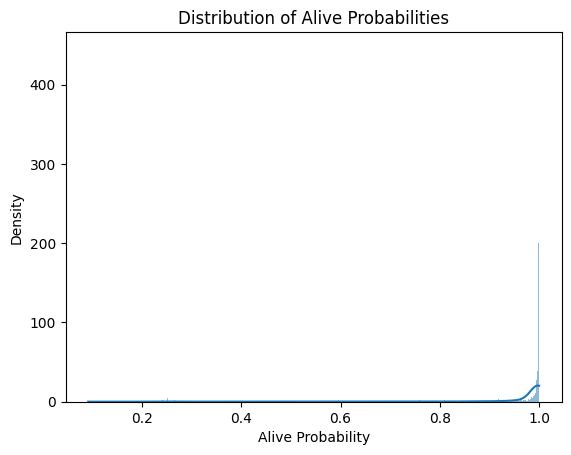

In [ ]:
# Plot the distribution of 'alive' probabilities
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(rfm['alive_probability'], kde=True, stat="density", linewidth=0)
plt.title('Distribution of Alive Probabilities')
plt.xlabel('Alive Probability')
plt.ylabel('Density')
plt.show()

<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

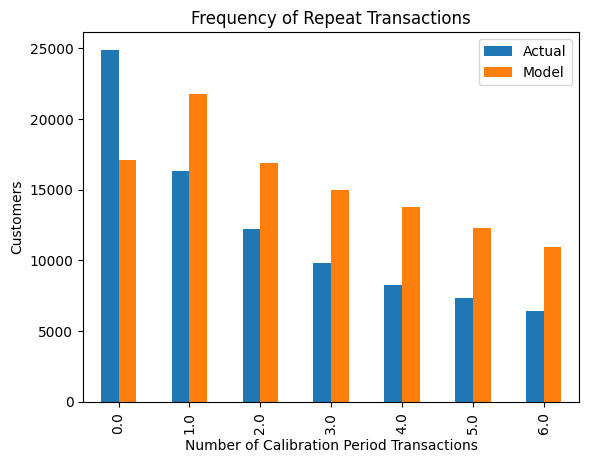

In [ ]:
from lifetimes.plotting import plot_period_transactions
plot_period_transactions(bgf)

In [ ]:
print(bgf.summary)

           coef  se(coef)  lower 95% bound  upper 95% bound
r      1.362464  0.005963         1.350776         1.374151
alpha  2.704986  0.013170         2.679173         2.730798
a      0.013489  0.000370         0.012763         0.014215
b      0.422095  0.010467         0.401581         0.442610


In [ ]:
rfm.describe()

,client_id,frequency,recency,T,monetary_value,alive_probability
count,1.705860e+05,170586.000000,170586.000000,170586.000000,1.705860e+05,170586.000000
mean,1.139314e+06,9.266323,13.891632,18.574500,3.128761e+03,0.939091
std,6.567712e+05,8.469041,8.883959,6.372500,1.207824e+04,0.161086
min,6.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.091417
25%,5.702582e+05,2.000000,4.935484,15.741935,2.306658e+02,0.982119
50%,1.140456e+06,6.000000,16.709677,21.580645,7.951239e+02,0.997904
75%,1.709758e+06,17.000000,22.548387,22.580645,2.320942e+03,0.999399
max,2.274517e+06,24.000000,23.548387,23.548387,1.679492e+06,1.000000


In [ ]:
def rfm_level(df):
    if df['RFM_Score'] >= 12:
        return 'Super Champions'
    elif df['RFM_Score'] > 10.5 and df['RFM_Score'] < 12:
        return 'Champions'
    elif df['RFM_Score'] > 8.0 and df['RFM_Score'] <= 10.5:
        return 'Potential Loyalist'
    elif df['RFM_Score'] > 7.0 and df['RFM_Score'] <= 8.0:
        return 'Need Attention'
    elif df['RFM_Score'] > 5.0 and df['RFM_Score'] <= 7.0:
        return 'At Risk'
    else:
        return 'Hibernating'

In [ ]:
rfm['RecencyScore'] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
rfm['FrequencyScore'] = pd.qcut(rfm['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm['MonetaryScore'] = pd.qcut(rfm['monetary_value'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])

rfm['RFM_Segment'] = rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].apply(lambda x: ''.join(x.astype(str)), axis=1)
rfm['RFM_Score'] = rfm[['RecencyScore', 'FrequencyScore', 'MonetaryScore']].sum(axis=1).astype(int)

# Apply the segmentation to the dataset
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)

# Display results
print(rfm[['client_id', 'RFM_Segment', 'RFM_Score', 'RFM_Level']].head(10))
rfm_segment_counts = rfm['RFM_Level'].value_counts()
print(rfm_segment_counts)

   client_id RFM_Segment  RFM_Score           RFM_Level
0          6         233          8      Need Attention
1          7         412          7             At Risk
2         14         155         11           Champions
3         18         155         11           Champions
4         25         511          7             At Risk
5         37         333          9  Potential Loyalist
6         40         154         10  Potential Loyalist
7         43         511          7             At Risk
8         55         413          8      Need Attention
9         56         243          9  Potential Loyalist
RFM_Level
Potential Loyalist    55148
At Risk               43581
Champions             32694
Need Attention        26417
Super Champions       12138
Hibernating             608
Name: count, dtype: int64


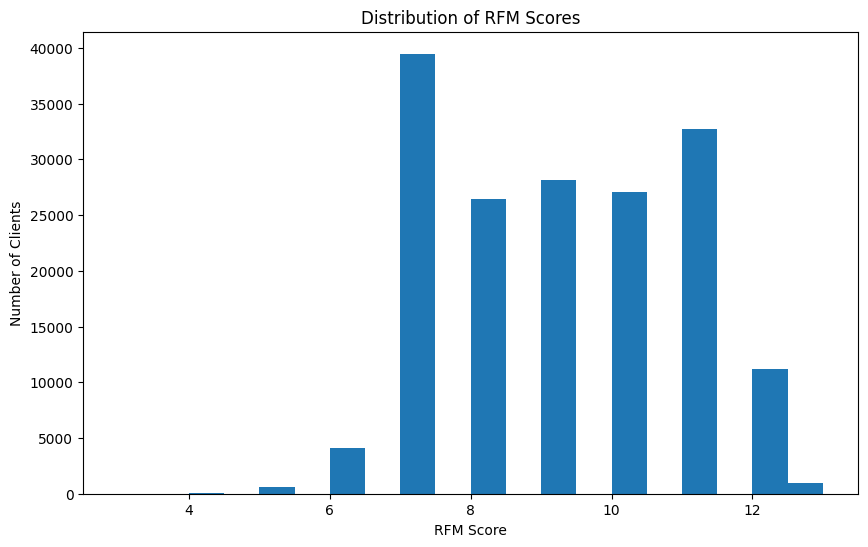

      Bin_Range  Count
0     3.0 - 3.5      1
1     3.5 - 4.0      0
2     4.0 - 4.5     41
3     4.5 - 5.0      0
4     5.0 - 5.5    566
5     5.5 - 6.0      0
6     6.0 - 6.5   4101
7     6.5 - 7.0      0
8     7.0 - 7.5  39480
9     7.5 - 8.0      0
10    8.0 - 8.5  26417
11    8.5 - 9.0      0
12    9.0 - 9.5  28110
13   9.5 - 10.0      0
14  10.0 - 10.5  27038
15  10.5 - 11.0      0
16  11.0 - 11.5  32694
17  11.5 - 12.0      0
18  12.0 - 12.5  11147
19  12.5 - 13.0    991


In [ ]:
# Generating the histogram plot for visualization
plt.figure(figsize=(10, 6))
hist_values = plt.hist(rfm['RFM_Score'], bins=20)
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Number of Clients')
plt.show()

# Extracting histogram values for numerical analysis
bin_counts = hist_values[0]  # Counts of clients in each bin
bin_edges = hist_values[1]  # Edges of the bins

# Preparing the data for sharing by creating a DataFrame
hist_df = pd.DataFrame({
    'Bin_Range': [f"{bin_edges[i]} - {bin_edges[i+1]}" for i in range(len(bin_edges)-1)],
    'Count': bin_counts.astype(int)
})

print(hist_df)

In [ ]:
rfm.columns

Index(['client_id', 'frequency', 'recency', 'T', 'monetary_value',
       'alive_probability', 'RecencyScore', 'FrequencyScore', 'MonetaryScore',
       'RFM_Segment', 'RFM_Score', 'RFM_Level', 'predicted_purchases', 'clv',
       'product_diversity', 'order_size_variability', 'rolling_recency',
       'days_since_last_major', 'most_common_purchase_month',
       'segment_specific_risk_of_churn', 'churned'],
      dtype='object')

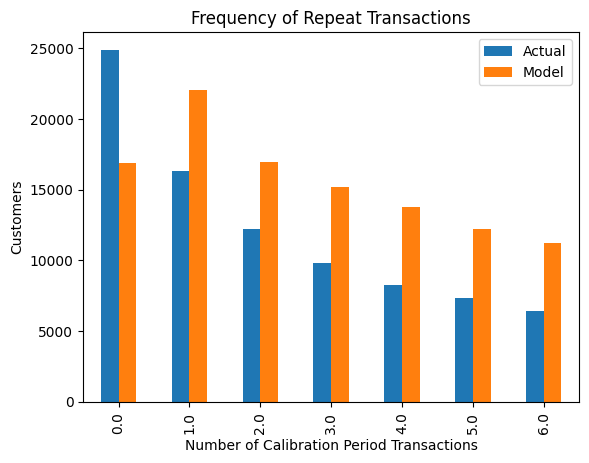

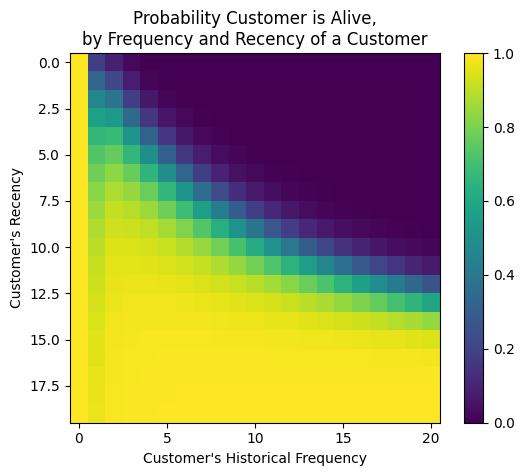

In [ ]:
from lifetimes.plotting import plot_probability_alive_matrix

# Visualization 1: Period Transactions
plot_period_transactions(bgf, max_frequency=7)  # Adjust max_frequency based on your dataset
plt.show()

# Visualization 2: Probability Alive Matrix
plot_probability_alive_matrix(bgf)
plt.show()

In [ ]:
# Estimate future purchases for the next 30 days
rfm['predicted_purchases'] = bgf.predict(30, rfm['frequency'], rfm['recency'], rfm['T'])

/Users/nawid/anaconda3/envs/myenvironment/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
from lifetimes import GammaGammaFitter

# Filter to customers with repeat purchases
repeat_customers = rfm[rfm['frequency'] > 0]

# Fit the Gamma-Gamma model
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(repeat_customers['frequency'], repeat_customers['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 145464 subjects, p: 3.19, q: 0.22, v: 3.14>

In [ ]:
# Calculate the CLV using the BG/NBD and Gamma-Gamma model outputs
# for the next 12 months, discount rate = 0.01 per month (~12.7% annually)
rfm['clv'] = ggf.customer_lifetime_value(
    bgf,
    rfm['frequency'],
    rfm['recency'],
    rfm['T'],
    rfm['monetary_value'],
    time=12,  # months
    discount_rate=0.01  # monthly discount rate
)

/Users/nawid/anaconda3/envs/myenvironment/lib/python3.10/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
rfm.columns

Index(['client_id', 'frequency', 'recency', 'T', 'monetary_value',
       'alive_probability', 'RecencyScore', 'FrequencyScore', 'MonetaryScore',
       'RFM_Segment', 'RFM_Score', 'RFM_Level', 'predicted_purchases', 'clv'],
      dtype='object')

# Customer Behavior Insights :-  **Analyze Rolling Metrics:** Delve into rolling metrics like recency, product diversity, and order size variability for deeper customer insights.
- **Churn Analysis:** Define and analyze customer churn with custom logic to identify customers at risk of lapsing.
- **Visualize Model Outputs:** Create visualizations of model outputs for an intuitive understanding of customer behavior and model accuracy.


In [ ]:
# Calculate the days between orders for each customer
transaction_data['prev_order_date'] = transaction_data.sort_values(by=['client_id', 'date_order']).groupby('client_id')['date_order'].shift(1)
transaction_data['days_between_orders'] = (transaction_data['date_order'] - transaction_data['prev_order_date']).dt.days

# Calculate rolling average of days between orders for the last 3 purchases
transaction_data['rolling_recency'] = transaction_data.groupby('client_id')['days_between_orders'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

In [ ]:
product_diversity = transaction_data.groupby('client_id')['product_id'].nunique().reset_index(name='product_diversity')


In [ ]:
transaction_data['order_size_variability'] = transaction_data.groupby('client_id')['quantity'].transform('std')

In [ ]:
# Merge product_diversity into RFM
rfm = rfm.merge(product_diversity, on='client_id', how='left')

# Calculate order size variability for each client and merge
order_size_variability = transaction_data.groupby('client_id')['order_size_variability'].mean().reset_index(name='order_size_variability')
rfm = rfm.merge(order_size_variability, on='client_id', how='left')

# Merge rolling recency into RFM
rolling_recency = transaction_data.groupby('client_id')['rolling_recency'].mean().reset_index(name='rolling_recency')
rfm = rfm.merge(rolling_recency, on='client_id', how='left')


In [ ]:
rfm.columns

Index(['client_id', 'frequency', 'recency', 'T', 'monetary_value',
       'alive_probability', 'RecencyScore', 'FrequencyScore', 'MonetaryScore',
       'RFM_Segment', 'RFM_Score', 'RFM_Level', 'predicted_purchases', 'clv',
       'product_diversity', 'order_size_variability', 'rolling_recency',
       'days_since_last_major', 'most_common_purchase_month'],
      dtype='object')

In [ ]:
# Assuming a major purchase is defined as being in the top 10% of `sales_net` for this customer
major_purchase_threshold = transaction_data.groupby('client_id')['sales_net'].transform(lambda x: x.quantile(0.9))
transaction_data['major_purchase_flag'] = (transaction_data['sales_net'] >= major_purchase_threshold).astype(int)
transaction_data['date_last_major_purchase'] = transaction_data[transaction_data['major_purchase_flag'] == 1].groupby('client_id')['date_order'].transform('max')
transaction_data['days_since_last_major'] = (pd.to_datetime('today') - transaction_data['date_last_major_purchase']).dt.days


In [ ]:
transaction_data['month'] = transaction_data['date_order'].dt.month


In [ ]:
# Aggregate to get the most recent value for each client
days_since_last_major = transaction_data.groupby('client_id')['days_since_last_major'].last().reset_index()

# Merge this with the RFM table
rfm = rfm.merge(days_since_last_major, on='client_id', how='left')

In [ ]:
# Calculate the most common purchase month for each customer
most_common_month = transaction_data.groupby('client_id')['month'].agg(lambda x: x.mode()[0]).reset_index(name='most_common_purchase_month')

# Merge this with the RFM table
rfm = rfm.merge(most_common_month, on='client_id', how='left')

In [ ]:
rolling_recency_stats = rfm['rolling_recency'].describe()
print("Rolling Recency Stats:\n", rolling_recency_stats)

Rolling Recency Stats:
 count    164277.000000
mean         13.660090
std          33.536861
min           0.000000
25%           1.028571
50%           4.229730
75%          13.083333
max         715.000000
Name: rolling_recency, dtype: float64


In [ ]:
product_diversity_stats = rfm['product_diversity'].describe()
print("Product Diversity Stats:\n", product_diversity_stats)

Product Diversity Stats:
 count    170586.000000
mean        155.692425
std         396.217324
min           1.000000
25%           9.000000
50%          35.000000
75%         134.000000
max       30812.000000
Name: product_diversity, dtype: float64


In [ ]:
order_size_variability_stats = rfm['order_size_variability'].describe()
print("Order Size Variability Stats:\n", order_size_variability_stats)


Order Size Variability Stats:
 count    164277.000000
mean        180.986675
std         907.217135
min           0.000000
25%          22.379412
50%          65.846068
75%         144.082603
max       81685.041993
Name: order_size_variability, dtype: float64


In [ ]:
days_since_last_major_stats = rfm['days_since_last_major'].describe()
print("Days Since Last Major Purchase Stats:\n", days_since_last_major_stats)


Days Since Last Major Purchase Stats:
 count    170586.000000
mean       1836.855463
std         217.224486
min        1629.000000
25%        1655.000000
50%        1733.000000
75%        1985.000000
max        2356.000000
Name: days_since_last_major, dtype: float64


## INSIGHTS FOR CUSTOMER BEHAVIOUR

In [ ]:
rfm

,client_id,frequency,recency,T,monetary_value,alive_probability,RecencyScore,FrequencyScore,MonetaryScore,RFM_Segment,...,RFM_Level,predicted_purchases,clv,product_diversity,order_size_variability,rolling_recency,days_since_last_major,most_common_purchase_month,segment_specific_risk_of_churn,churned
0,6,8.0,21.580645,22.580645,565.517890,0.997355,2,3,3,233,...,Need Attention,11.001609,7.078255e+04,37,183.530609,16.572650,1691.0,7,0,0
1,7,1.0,4.935484,13.774194,481.204467,0.835826,4,1,2,412,...,At Risk,3.540429,2.482326e+04,10,4.792852,11.500000,2065.0,12,1,0
2,14,24.0,23.548387,23.548387,130417.780708,0.999424,1,5,5,155,...,Champions,28.788159,4.185417e+07,4898,422.643638,0.056888,1634.0,7,1,0
3,18,24.0,23.548387,23.548387,10205.089998,0.999424,1,5,5,155,...,Champions,28.788159,3.275095e+06,786,95.638674,0.322692,1644.0,1,0,0
4,25,0.0,0.000000,10.806452,0.000000,1.000000,5,1,1,511,...,At Risk,NaN,NaN,4,27.712813,0.000000,1979.0,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170581,2274456,1.0,1.000000,1.000000,596.549160,0.969033,5,2,3,523,...,Potential Loyalist,17.968324,1.554267e+05,16,67.899914,0.469697,1652.0,8,1,0
170582,2274479,1.0,15.741935,22.580645,341.471800,0.936932,3,2,2,322,...,At Risk,2.595762,1.297293e+04,5,1.699673,53.888889,1839.0,10,1,0
170583,2274504,1.0,13.741935,21.580645,24.771000,0.925712,3,2,1,321,...,At Risk,2.669444,1.080415e+03,4,1.000000,47.222222,2321.0,11,1,0
170584,2274508,0.0,0.000000,22.580645,0.000000,1.000000,5,1,1,511,...,At Risk,NaN,NaN,4,44.756484,0.000000,2336.0,10,1,0


In [ ]:
transaction_data.columns

Index(['date_order', 'date_invoice', 'product_id', 'client_id', 'sales_net',
       'quantity', 'order_channel', 'branch_id', 'prev_order_date',
       'days_between_orders', 'rolling_recency', 'order_size_variability',
       'major_purchase_flag', 'date_last_major_purchase',
       'days_since_last_major', 'month'],
      dtype='object')

In [ ]:
# Ensure the 'date_order' column is the correct datetime format
transaction_data['date_order'] = pd.to_datetime(transaction_data['date_order'])
transaction_data['month'] = transaction_data['date_order'].dt.month
transaction_data['year'] = transaction_data['date_order'].dt.year

# Merge the transaction data with RFM levels to get RFM_Level for each transaction
merged_data = pd.merge(transaction_data, rfm[['client_id', 'RFM_Level']], on='client_id', how='left')

# Calculate the number of transactions per month for each RFM Level
monthly_transactions_by_RFM = merged_data.groupby(['year', 'month', 'RFM_Level']).size().reset_index(name='transactions')

# Calculate average transactions per month for each RFM Level
average_monthly_transactions_by_RFM = monthly_transactions_by_RFM.groupby(['month', 'RFM_Level'])['transactions'].mean().unstack()

print(average_monthly_transactions_by_RFM)


RFM_Level  At Risk     Champions  Hibernating  Need Attention  \
month                                                           
1          17867.5  2.240470e+06        166.5    40901.500000   
2          15896.0  2.106236e+06        149.0    36933.500000   
3          18435.0  2.519396e+06        113.5    42349.500000   
4          14823.0  2.064108e+06        100.0    33338.000000   
5          13144.0  1.782942e+06         96.0    32292.500000   
6          18904.5  2.317742e+06        107.5    42861.500000   
7          22503.0  2.533579e+06        202.0    47869.000000   
8          29606.5  2.715726e+06        316.5    54920.000000   
9          16668.0  1.184334e+06        294.0    27289.666667   
10         31963.0  2.509286e+06        498.0    58924.000000   
11         24122.5  2.378870e+06        311.0    50358.000000   
12         20473.5  2.268060e+06        208.5    44367.500000   

RFM_Level  Potential Loyalist  
month                          
1                    3009

In [ ]:
# Descriptive statistics for RFM Scores within each RFM Level
rfm_scores_summary_by_level = rfm.groupby('RFM_Level')['RFM_Score'].describe()

print(rfm_scores_summary_by_level)


                      count       mean       std   min   25%   50%   75%   max
RFM_Level                                                                     
At Risk             43581.0   6.905899  0.291972   6.0   7.0   7.0   7.0   7.0
Champions           44832.0  11.292849  0.501302  11.0  11.0  11.0  12.0  13.0
Hibernating           608.0   4.929276  0.262916   3.0   5.0   5.0   5.0   5.0
Need Attention      26417.0   8.000000  0.000000   8.0   8.0   8.0   8.0   8.0
Potential Loyalist  55148.0   9.490281  0.499910   9.0   9.0   9.0  10.0  10.0


In [ ]:
# Basic descriptive statistics for key metrics
rfm_descriptive_stats = rfm[['recency', 'frequency', 'monetary_value', 'product_diversity', 'order_size_variability', 'rolling_recency', 'days_since_last_major']].describe()

print(rfm_descriptive_stats)


             recency      frequency  monetary_value  product_diversity  \
count  170586.000000  170586.000000    1.705860e+05      170586.000000   
mean       13.891632       9.266323    3.128761e+03         155.692425   
std         8.883959       8.469041    1.207824e+04         396.217324   
min         0.000000       0.000000    0.000000e+00           1.000000   
25%         4.935484       2.000000    2.306658e+02           9.000000   
50%        16.709677       6.000000    7.951239e+02          35.000000   
75%        22.548387      17.000000    2.320942e+03         134.000000   
max        23.548387      24.000000    1.679492e+06       30812.000000   

       order_size_variability  rolling_recency  days_since_last_major  
count           164277.000000    164277.000000          170586.000000  
mean               180.986675        13.660090            1836.855463  
std                907.217135        33.536861             217.224486  
min                  0.000000         0.00000

In [ ]:
# Calculate the average order size for each transaction
transaction_data['order_size'] = transaction_data['sales_net'] / transaction_data['quantity']

# Calculate the average order size by month and year
average_order_size_by_month_year = transaction_data.groupby(['year', 'month'])['order_size'].mean().reset_index()

# Optionally, calculate the month-over-month percentage change in average order size
average_order_size_by_month_year['pct_change'] = average_order_size_by_month_year['order_size'].pct_change() * 100

print(average_order_size_by_month_year)


    year  month  order_size  pct_change
0   2017      9   22.500136         NaN
1   2017     10   22.642379    0.632184
2   2017     11   22.885400    1.073304
3   2017     12   23.113769    0.997880
4   2018      1   22.996740   -0.506316
5   2018      2   23.135897    0.605114
6   2018      3   23.575962    1.902086
7   2018      4   22.849410   -3.081748
8   2018      5   22.026064   -3.603356
9   2018      6   23.188259    5.276454
10  2018      7   24.102142    3.941145
11  2018      8   24.297173    0.809183
12  2018      9   23.922444   -1.542274
13  2018     10   23.508790   -1.729144
14  2018     11   23.194828   -1.335512
15  2018     12   23.417467    0.959868
16  2019      1   23.053438   -1.554520
17  2019      2   23.789972    3.194901
18  2019      3   24.940364    4.835614
19  2019      4   23.533711   -5.640065
20  2019      5   22.575951   -4.069737
21  2019      6   24.368841    7.941595
22  2019      7   24.656128    1.178911
23  2019      8   25.558169    3.658484


## NEW CHURN DEFINITION

In [ ]:
def define_risk_of_churn_with_segments(row):
    """
    Defines the risk of churn based on observed behaviors, seasonality, alive probability,
    and tailored to specific RFM segments for targeted marketing strategies.
    """
    # Common conditions across all segments
    common_conditions = [
        row['most_common_purchase_month'] in [6, 7, 8, 10, 11],  # High-activity months
        row['alive_probability'] < 0.5  # General alive probability threshold
    ]

    # Segment-specific adjustments
    if row['RFM_Level'] == 'Champions':
        # Champions might be given a higher threshold for engagement due to their value
        return 1 if row['rolling_recency'] > 22 or any(common_conditions) else 0
    elif row['RFM_Level'] == 'Potential Loyalist':
        # Potential Loyalists showing signs of reduced diversity or high order variability might be at risk
        return 1 if row['product_diversity'] < 9 or row['order_size_variability'] > 144.08 or any(common_conditions) else 0
    elif row['RFM_Level'] in ['At Risk', 'Hibernating']:
        # At Risk or Hibernating customers with extended periods since last major purchase signal churn risk
        return 1 if row['days_since_last_major'] > 1985 or any(common_conditions) else 0
    else:
        # Default condition for other segments
        return 0

In [ ]:
def enhanced_define_churn(row):
    """
    Enhances the definition of churn based on recency, segment-specific behavior, and alive probability,
    adjusted for time units and dynamics of the dataset.
    """
    churn_threshold_months = 12  # Considering time units are in months
    risk_indicator = 0.5  # Alive probability threshold

    if row['alive_probability'] < risk_indicator and row['recency'] > churn_threshold_months:
        return 1  # Considered churned
    elif row['RFM_Level'] == 'Hibernating' and row['recency'] > churn_threshold_months:
        return 1  # Extended inactivity in 'Hibernating' segment also indicates churn
    else:
        return 0  # Not churned


In [ ]:
def enhanced_define_churn(row, churn_threshold=365, risk_indicator=0.5):
    """
    Enhances the definition of churn based on recency, segment-specific behavior, and alive probability.
    """
    if row['alive_probability'] < risk_indicator and row['recency'] > churn_threshold:
        return 1  # Considered churned
    elif row['RFM_Level'] == 'Hibernating' and row['recency'] > churn_threshold:
        return 1  # Extended inactivity in 'Hibernating' segment also indicates churn
    else:
        return 0  # Not churned

In [ ]:
# Apply the function to the RFM dataframe
rfm['segment_specific_risk_of_churn'] = rfm.apply(define_risk_of_churn_with_segments, axis=1)

In [ ]:
rfm['churned'] = rfm.apply(enhanced_define_churn, axis=1)

In [ ]:
# number of 1 values in column 'churned'
churned_count = rfm['churned'].sum()
print(churned_count)

# number of 0 values in column 'churned'
not_churned_count = rfm.shape[0] - churned_count
print(not_churned_count)

# Calculate the churn rate
churn_rate = churned_count / rfm.shape[0]
print(churn_rate)

# Percent of clients from all the unique clients that have churned
churned_percent = churned_count / not_churned_count * 100
print(churned_percent)


861
169725
0.005047307516443319
0.5072912063632347


In [ ]:
# rfm describe for only columns frequency, recency, T, monetary_value, alive_probability, predicted_purchases, clv
rfm[['frequency', 'recency', 'T', 'monetary_value', 'alive_probability', 'predicted_purchases', 'clv']].describe()

,frequency,recency,T,monetary_value,alive_probability,predicted_purchases,clv
count,170586.000000,170586.000000,170586.000000,1.705860e+05,170586.000000,145464.000000,1.454640e+05
mean,9.266323,13.891632,18.574500,3.128761e+03,0.939091,15.295252,9.510613e+05
std,8.469041,8.883959,6.372500,1.207824e+04,0.161086,9.314627,3.908714e+06
min,0.000000,0.000000,0.000000,0.000000e+00,0.091417,0.616290,3.606626e+01
25%,2.000000,4.935484,15.741935,2.306658e+02,0.982119,6.769261,4.104479e+04
50%,6.000000,16.709677,21.580645,7.951239e+02,0.997904,14.298115,1.521707e+05
75%,17.000000,22.548387,22.580645,2.320942e+03,0.999399,24.506176,6.029497e+05
max,24.000000,23.548387,23.548387,1.679492e+06,1.000000,28.788159,4.738493e+08


In [ ]:
#save rfm to csv
rfm.to_csv('rfm_SC.csv', index=False)

## DEFINING AND SETTING CHRUN COLUMN

### Strategy for Defining Churn:

Utilize recency and T for Inactivity: Since recency represents the age of a customer's last purchase and T the age of the customer in the dataset, we can infer inactivity. A customer who hasn't purchased recently relative to their overall age in the dataset may be at risk.

Incorporate RFM_Level and alive_probability: As initially discussed, combining RFM segmentation with the 'alive' probability provides a nuanced view of customer engagement and future activity likelihood.



In [ ]:
# number of NaN values in each column
print(rfm.isna().sum())

client_id                  0
frequency                  0
recency                    0
T                          0
monetary_value             0
RecencyScore               0
FrequencyScore             0
MonetaryScore              0
RFM_Segment                0
RFM_Score                  0
RFM_Level                  0
alive_probability          0
predicted_purchases    25122
clv                    25122
dtype: int64


In [ ]:
# Replace NaN values in 'clv' with 0
rfm['clv'].fillna(0, inplace=True)

# Replace NaN values in with 0
rfm['predicted_purchases'] = rfm['predicted_purchases'].fillna(0)

In [ ]:
# save rfm table to csv file
rfm.to_csv('rfm_table.csv', index=False)

In [ ]:
rfm = pd.read_csv('rfm_table.csv')

In [ ]:
rfm

,client_id,frequency,recency,T,monetary_value,alive_probability,RecencyScore,FrequencyScore,MonetaryScore,RFM_Segment,...,RFM_Level,predicted_purchases,clv,product_diversity,order_size_variability,rolling_recency,days_since_last_major,most_common_purchase_month,segment_specific_risk_of_churn,churned
0,6,8.0,21.580645,22.580645,565.517890,0.997355,2,3,3,233,...,Need Attention,11.001609,7.078255e+04,37,183.530609,16.572650,1691.0,7,0,0
1,7,1.0,4.935484,13.774194,481.204467,0.835826,4,1,2,412,...,At Risk,3.540429,2.482326e+04,10,4.792852,11.500000,2065.0,12,1,0
2,14,24.0,23.548387,23.548387,130417.780708,0.999424,1,5,5,155,...,Champions,28.788159,4.185417e+07,4898,422.643638,0.056888,1634.0,7,1,0
3,18,24.0,23.548387,23.548387,10205.089998,0.999424,1,5,5,155,...,Champions,28.788159,3.275095e+06,786,95.638674,0.322692,1644.0,1,0,0
4,25,0.0,0.000000,10.806452,0.000000,1.000000,5,1,1,511,...,At Risk,NaN,NaN,4,27.712813,0.000000,1979.0,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170581,2274456,1.0,1.000000,1.000000,596.549160,0.969033,5,2,3,523,...,Potential Loyalist,17.968324,1.554267e+05,16,67.899914,0.469697,1652.0,8,1,0
170582,2274479,1.0,15.741935,22.580645,341.471800,0.936932,3,2,2,322,...,At Risk,2.595762,1.297293e+04,5,1.699673,53.888889,1839.0,10,1,0
170583,2274504,1.0,13.741935,21.580645,24.771000,0.925712,3,2,1,321,...,At Risk,2.669444,1.080415e+03,4,1.000000,47.222222,2321.0,11,1,0
170584,2274508,0.0,0.000000,22.580645,0.000000,1.000000,5,1,1,511,...,At Risk,NaN,NaN,4,44.756484,0.000000,2336.0,10,1,0


In [ ]:
rfm.columns

Index(['client_id', 'frequency', 'recency', 'T', 'monetary_value',
       'alive_probability', 'RecencyScore', 'FrequencyScore', 'MonetaryScore',
       'RFM_Segment', 'RFM_Score', 'RFM_Level', 'predicted_purchases', 'clv',
       'product_diversity', 'order_size_variability', 'rolling_recency',
       'days_since_last_major', 'most_common_purchase_month',
       'segment_specific_risk_of_churn', 'churned'],
      dtype='object')

In [ ]:
#  number of unquiue values in churned column
print(rfm['churned'].nunique())

2


In [ ]:
def define_churn(row):
    # Determine the threshold for inactivity in terms of recency and customer age (T)
    # For example, if recency is close to T, it means the customer hasn't purchased in a long time
    inactivity_threshold = 0.7  # 70% of the time between first purchase and last purchase

    # For customers with zero frequency, look at their 'alive_probability' more closely.
    # This considers that even one-time buyers might not be churned if they're still relatively 'alive' according to the model.
    if row['frequency'] == 0:
        churn_indicator = 1 if row['alive_probability'] < 0.5 else 0
    elif row['recency'] / row['T'] < inactivity_threshold and row['alive_probability'] < 0.5:
        churn_indicator = 1  # High inactivity and low 'alive' probability
    elif row['RFM_Level'] in ['Hibernating', 'At Risk'] and row['alive_probability'] < 0.5:
        churn_indicator = 1  # Low engagement (RFM) and low 'alive' probability
    else:
        churn_indicator = 0  # Not churned

    return churn_indicator

In [ ]:
# drop the 'is_churned' column
rfm.drop('is_churned', axis=1, inplace=True)

In [ ]:
rfm['is_churned'] = rfm.apply(define_churn, axis=1)

In [ ]:
# count the number of churned customers where column 'is_churned' is 1
churned_customers = rfm['is_churned'].sum()
print(f"Number of churned customers: {churned_customers}")

KeyError: 'is_churned'

In [ ]:
# Automatically determine the latest date in your dataset for the observation period end
latest_date = transaction_data['date_order'].max()

# For the calibration period end, we might choose a date that splits the data.
# For simplicity, let's assume we want to use the last 6 months of data as the observation period.

from datetime import timedelta
calibration_period_end = latest_date - timedelta(days=180)  # Adjust based on your needs

In [ ]:
rfm_cal_holdout = calibration_and_holdout_data(
    transactions=transaction_data,
    customer_id_col='client_id',
    datetime_col='date_order',
    monetary_value_col='sales_net',
    calibration_period_end=calibration_period_end,
    observation_period_end=latest_date,
    freq='W'  # Weekly frequency, adjust if needed
)

print(rfm_cal_holdout.head(3))

           frequency_cal  recency_cal  T_cal  monetary_value_cal  \
client_id                                                          
6                    6.0         68.0   74.0          355.716209   
7                    1.0         23.0   36.0          481.204467   
14                  77.0         78.0   78.0        30472.042788   

           frequency_holdout  monetary_value_holdout  duration_holdout  
client_id                                                               
6                        3.0              199.153823              25.0  
7                        0.0                0.000000              25.0  
14                      26.0              231.229803              25.0  


In [ ]:
rfm_cal_holdout

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout
client_id,,,,,,,
6,6.0,68.0,74.0,355.716209,3.0,199.153823,25.0
7,1.0,23.0,36.0,481.204467,0.0,0.000000,25.0
14,77.0,78.0,78.0,30472.042788,26.0,231.229803,25.0
18,72.0,78.0,78.0,2128.797980,23.0,113.198271,25.0
25,0.0,0.0,24.0,0.000000,0.0,0.000000,25.0
...,...,...,...,...,...,...,...
2274440,13.0,77.0,78.0,1350.994346,8.0,120.767826,25.0
2274479,1.0,69.0,73.0,341.471800,0.0,0.000000,25.0
2274504,1.0,61.0,73.0,24.771000,0.0,0.000000,25.0


In [ ]:
from lifetimes import BetaGeoFitter

# Instantiate the BG/NBD model
bgf = BetaGeoFitter(penalizer_coef=0.0)

# Fit the BG/NBD model on the calibration data
bgf.fit(frequency=rfm_cal_holdout['frequency_cal'],
        recency=rfm_cal_holdout['recency_cal'],
        T=rfm_cal_holdout['T_cal'])

print("Model fitting completed.")

Model fitting completed.


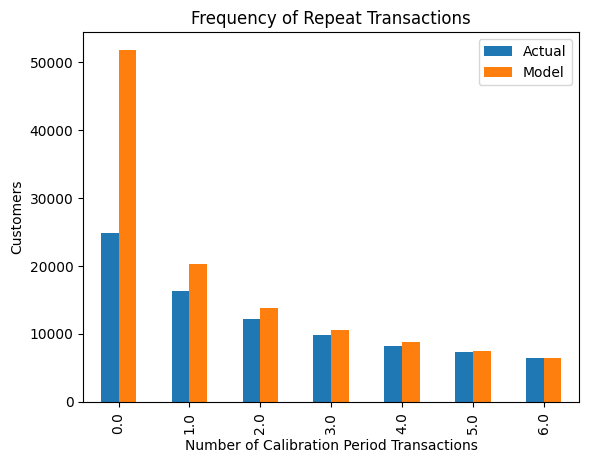

In [ ]:
from lifetimes.plotting import plot_period_transactions

# Plot actual vs predicted transactions
_ = plot_period_transactions(bgf)

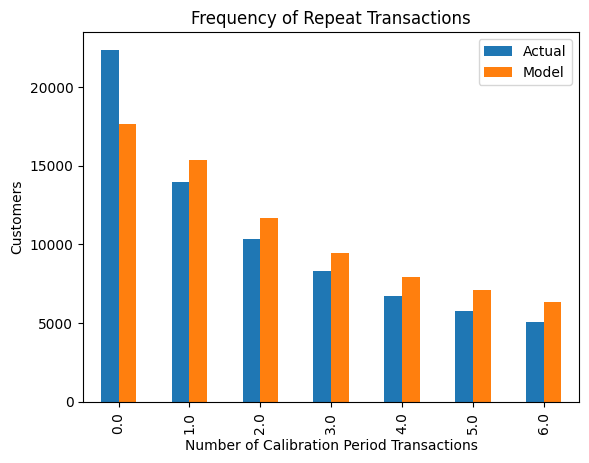

In [ ]:
from lifetimes.plotting import plot_period_transactions

# Plot actual vs predicted transactions
_ = plot_period_transactions(bgf)

In [ ]:
# Select a sample customer from the calibration and holdout dataset
sample_customer = rfm_cal_holdout.iloc[20]

# Inspect the selected customer's metrics
print(sample_customer)

frequency_cal              11.000000
recency_cal                52.000000
T_cal                      66.000000
monetary_value_cal        419.850339
frequency_holdout           6.000000
monetary_value_holdout     63.034026
duration_holdout           25.000000
Name: 211, dtype: float64


In [ ]:
# Predict the expected number of transactions for the next 26 weeks
n_transactions_pred = bgf.predict(t=26,  # Number of weeks
                                  frequency=sample_customer['frequency_cal'],
                                  recency=sample_customer['recency_cal'],
                                  T=sample_customer['T_cal'])

print(f"Predicted number of transactions in next 26 weeks: {n_transactions_pred}")


Predicted number of transactions in next 26 weeks: 4.101270402615595


In [ ]:
# Calculate the probability that the customer is still active
alive_prob = bgf.conditional_probability_alive(frequency=sample_customer['frequency_cal'],
                                               recency=sample_customer['recency_cal'],
                                               T=sample_customer['T_cal'])

print(f"Probability of being alive: {alive_prob}")

Probability of being alive: [0.93051783]


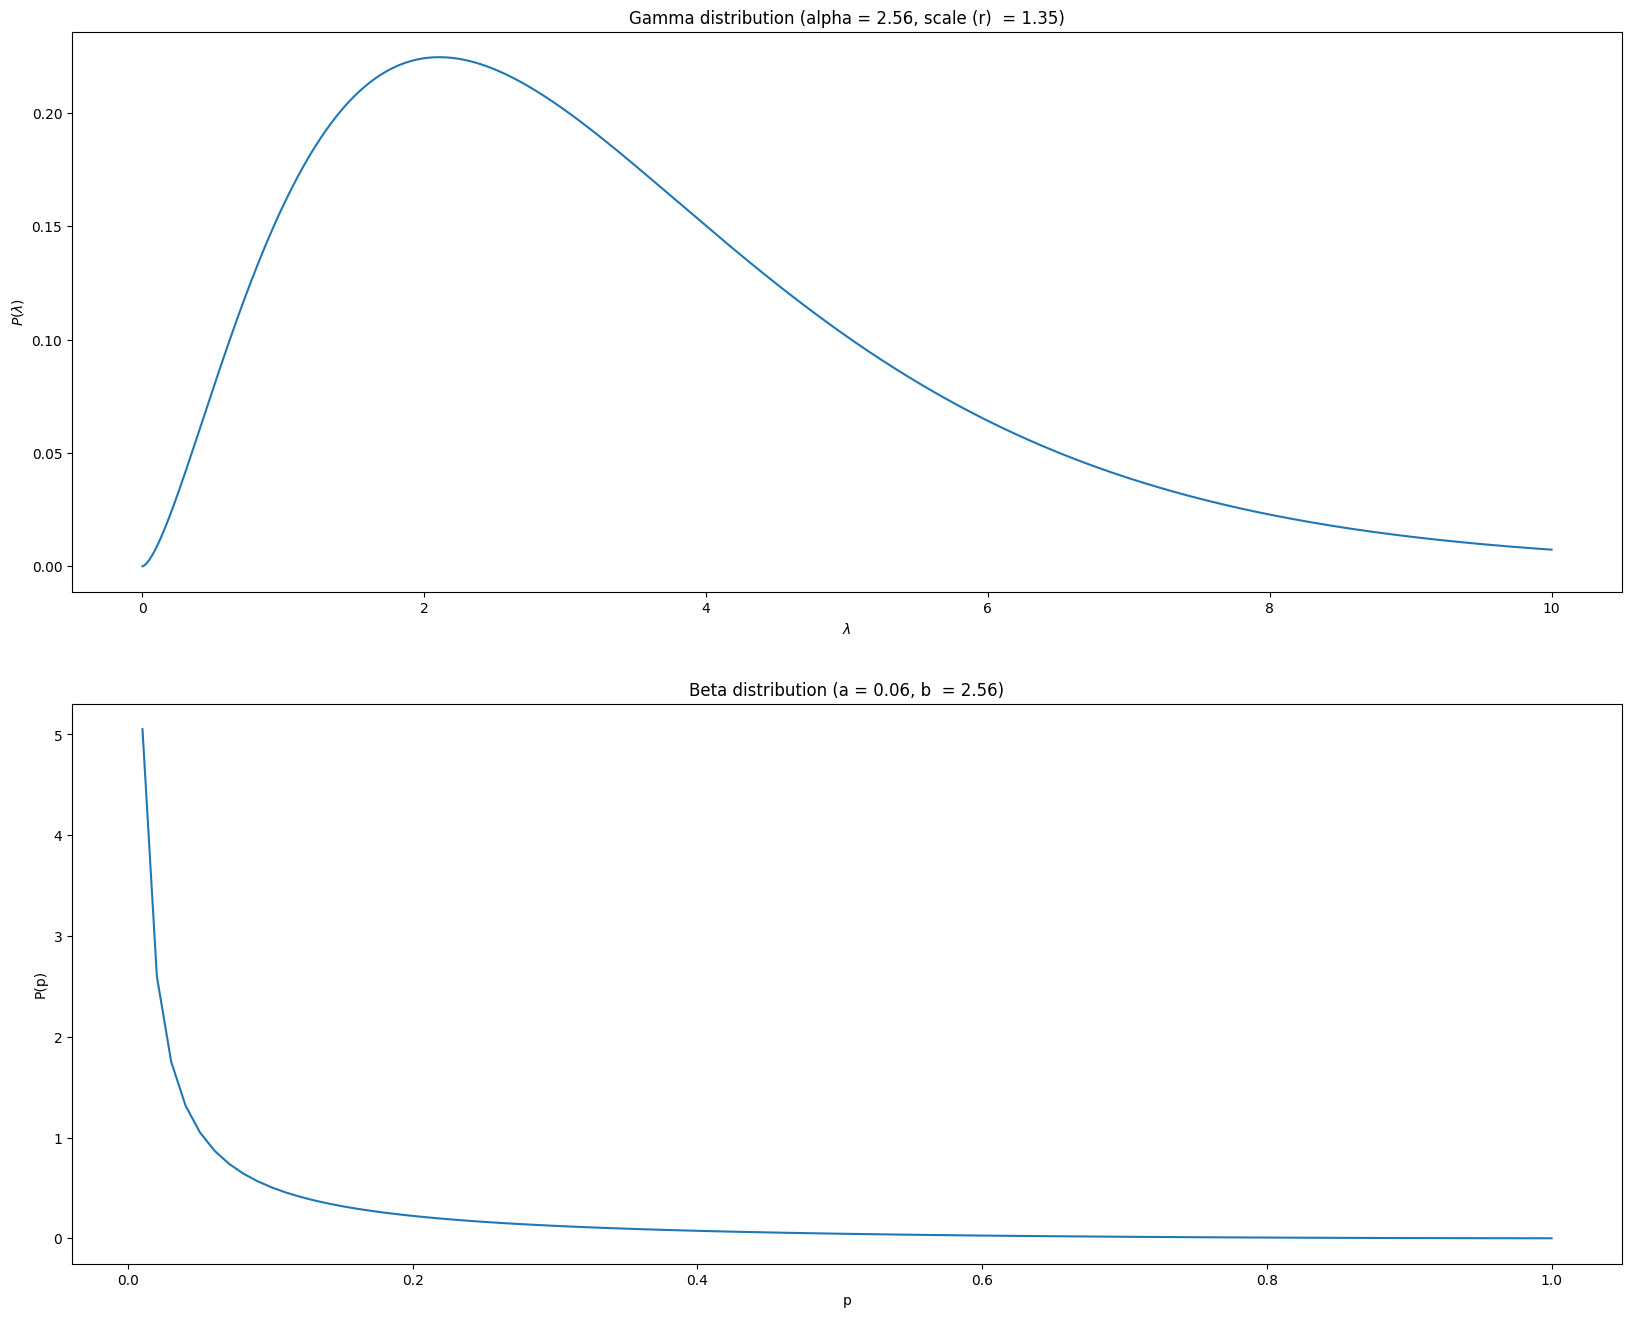

In [ ]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

fig, (ax_gamma, ax_beta) = plt.subplots(ncols=1, nrows=2, figsize=(20, 16))

# Gamma Distribution
x_gamma = np.linspace(0, 10, 1000)
y_gamma = stats.gamma.pdf(x_gamma, a=bgf.params_["alpha"], scale=1/bgf.params_["r"])
ax_gamma.plot(x_gamma, y_gamma, "-")
ax_gamma.set_title(f'Gamma distribution (alpha = {bgf.params_["alpha"]:.2f}, scale (r)  = {1/bgf.params_["r"]:.2f})')
ax_gamma.set_xlabel(r'$\lambda$')
ax_gamma.set_ylabel(r'$P(\lambda)$')

# Beta Distribution
x_beta = np.linspace(0, 1, 100)
y_beta = stats.beta.pdf(x_beta, a=bgf.params_["a"], b=bgf.params_["b"])
ax_beta.plot(x_beta, y_beta, "-")
ax_beta.set_title(f'Beta distribution (a = {bgf.params_["a"]:.2f}, b  = {bgf.params_["b"]:.2f})')
ax_beta.set_xlabel('p')
ax_beta.set_ylabel('P(p)')

plt.show()